# Assignment 3 DSA6100
Name- Shrankhala Jain
Id- gl4558

Introduction:
This dataset is taken from Kaggle’s ‘Used Car Database’ scraped from Ebay-Kleinanzeigen (in German) containing prices and attributes for approximately 370.000 second-hand cars of 40 unique brands. 

Aim: 
To find out the price and the top most brand in used car market in germany.

In [ ]:
import pandas as pd
import numpy as np


In [50]:
# To Read the dataset
cars = pd.read_csv("/Users/ankurjain/Desktop/autos.csv", encoding='latin1')
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [25]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [12]:
#Display the columns in the dataset
cars.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [13]:
#what are the types of the columns?
cars.dtypes

Object `columns` not found.


dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [14]:
#Find if data has missing values?
#Find missing values by each column
cars.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [15]:
#Find proportion of data that is missing for each of the columns
cars.isnull().sum()/cars.shape[0] * 100

dateCrawled             0.000000
name                    0.000000
seller                  0.000000
offerType               0.000000
price                   0.000000
abtest                  0.000000
vehicleType            10.192771
yearOfRegistration      0.000000
gearbox                 5.439429
powerPS                 0.000000
model                   5.513447
kilometer               0.000000
monthOfRegistration     0.000000
fuelType                8.986133
brand                   0.000000
notRepairedDamage      19.395577
dateCreated             0.000000
nrOfPictures            0.000000
postalCode              0.000000
lastSeen                0.000000
dtype: float64

# Cleaning the data

In [20]:
cars= cars.drop(['dateCrawled','name','seller','offerType','abtest','nrOfPictures','postalCode'], axis=1)
cars.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
0,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,2016-04-07 03:16:57
1,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,2016-04-07 01:46:50
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,2016-04-05 12:47:46
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,2016-03-17 17:40:17
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,2016-04-06 10:17:21


In [21]:
# For outliers
cars= cars[(cars.price >= 500) & (cars.price <=160000) & (cars.yearOfRegistration >=1950) &(cars.yearOfRegistration <=2016) & (cars.powerPS >=10) & (cars.powerPS<=500)]
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295106 entries, 1 to 371527
Data columns (total 13 columns):
price                  295106 non-null int64
vehicleType            286548 non-null object
yearOfRegistration     295106 non-null int64
gearbox                290497 non-null object
powerPS                295106 non-null int64
model                  284931 non-null object
kilometer              295106 non-null int64
monthOfRegistration    295106 non-null int64
fuelType               282200 non-null object
brand                  295106 non-null object
notRepairedDamage      257734 non-null object
dateCreated            295106 non-null object
lastSeen               295106 non-null object
dtypes: int64(5), object(8)
memory usage: 31.5+ MB


# Visualization

In [ ]:
cars['vehicleType'].fillna('none', inplace=True)
cars['gearbox'].fillna('none',inplace=True)
cars['model'].fillna('none',inplace=True)
cars['fuelType'].fillna('none',inplace=True)
cars['notRepairedDamage'].fillna('none',inplace=True)

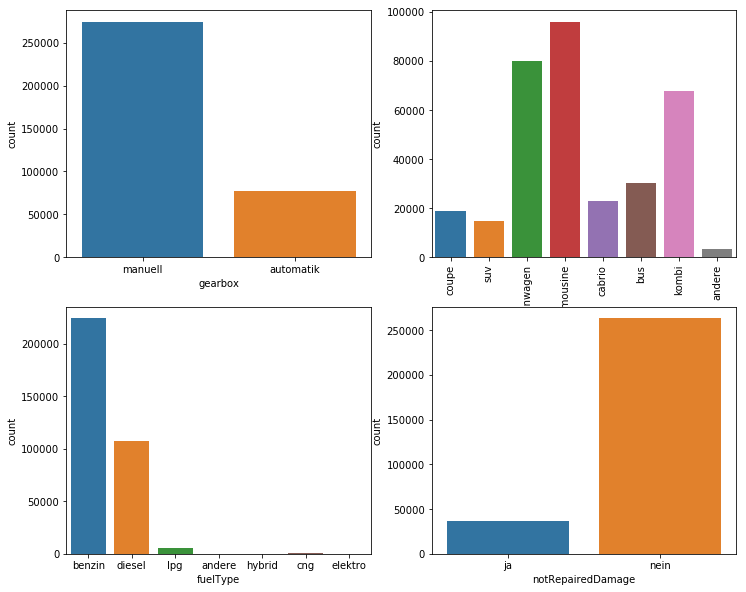

In [33]:
import seaborn as sns
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(cars['gearbox'])
plt.subplot(2,2,2)
sns.countplot(cars['vehicleType'])
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.countplot(cars['fuelType'])
plt.subplot(2,2,4)
sns.countplot(cars['notRepairedDamage'])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

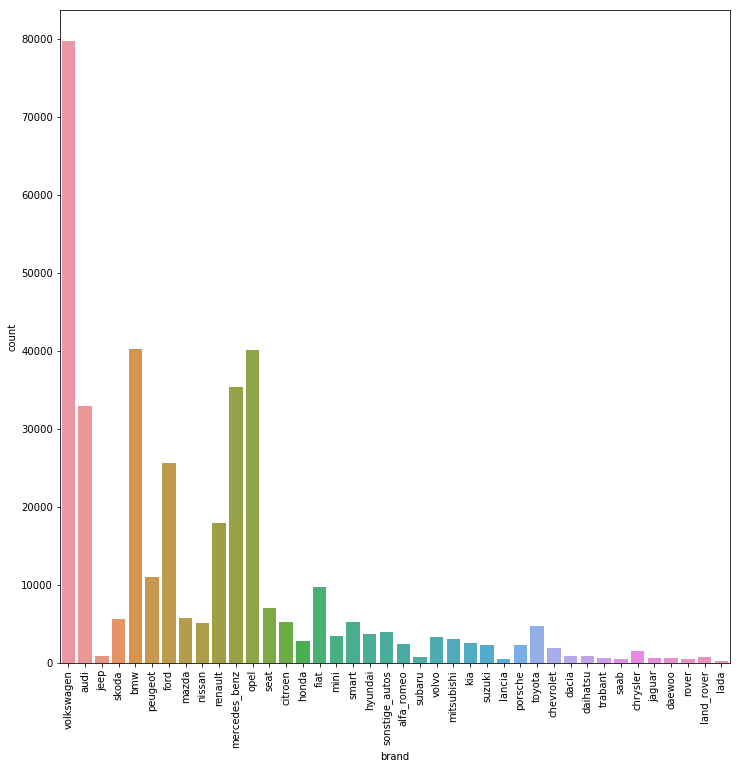

In [32]:
plt.figure(figsize=(12,12))
sns.countplot(cars['brand'])
plt.xticks(rotation=90)

According to above plot the top brand in used cars is volkswagen and second top most is audi.And Limousine is the most selling car.

In [37]:
cars.loc[cars.price > 160000].count()['name']


220

In [38]:
cars.loc[cars.yearOfRegistration < 1960].count()['name']


540

In [39]:
cars= cars[(cars.yearOfRegistration <= 2016)& (cars.yearOfRegistration >= 1950) & (cars.price>=100) & (cars.price<=160000)] 

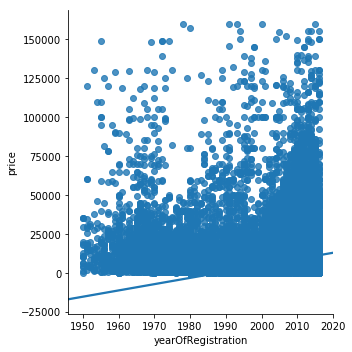

In [40]:
sns.lmplot('yearOfRegistration','price', data= cars)


In [51]:
cars.yearOfRegistration.unique() 


array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1968, 1982, 1976, 1983, 1959, 1973, 1111, 1969, 1971,
       1987, 1986, 1988, 1967, 1970, 1965, 1945, 1925, 1974, 1979, 1955,
       1978, 1972, 1977, 1961, 1963, 1964, 1960, 1966, 1975, 1937, 1936,
       5000, 1954, 1958, 9999, 1956, 3200, 1000, 1933, 1941, 1962, 8888,
       1500, 2200, 4100, 1929, 1951, 1957, 1940, 3000, 2066, 1949, 2019,
       1800, 1953, 1935, 1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911,
       1400, 1950, 4000, 1948, 1952, 1200, 8500, 1932, 1255, 1927, 1923,
       1931, 3700, 3800, 4800, 1942, 7000, 1911, 6500, 2290, 2500, 1930,
       1001, 6200, 9450, 1944, 1943, 1947, 1934, 1938, 1688, 2800, 1253,
       1928, 7500, 1919, 5555, 7777, 5600, 1600, 1939, 2222, 1039, 9996,
       1300, 8455, 1915, 4500, 1920, 1602, 7800, 92

In [52]:
cars['dateCreatedMod'] = (pd.to_datetime(cars['dateCreated']))
cars['lastSeenMod'] = (pd.to_datetime(cars['lastSeen']))
cars['Ad_age']=(cars['lastSeenMod']-cars['dateCreatedMod']).astype("timedelta64[D]")

In [53]:
cars['car_age']= 2016- cars['yearOfRegistration']


In [54]:
cars.head()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,dateCreatedMod,lastSeenMod,Ad_age,car_age
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,...,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,2016-03-24,2016-04-07 03:16:57,14.0,23
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,...,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,2016-03-24,2016-04-07 01:46:50,14.0,5
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,...,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,2016-03-14,2016-04-05 12:47:46,22.0,12
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,...,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,2016-03-17,2016-03-17 17:40:17,0.0,15
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,...,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,2016-03-31,2016-04-06 10:17:21,6.0,8


In [55]:
cars= cars.drop(['yearOfRegistration','dateCreated','lastSeen','dateCreatedMod','lastSeenMod'],axis=1)


In [56]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
Ad_age                 371528 non-null float64
car_age                371528 non-null int64
dtypes: float64(1), i

# Correlation

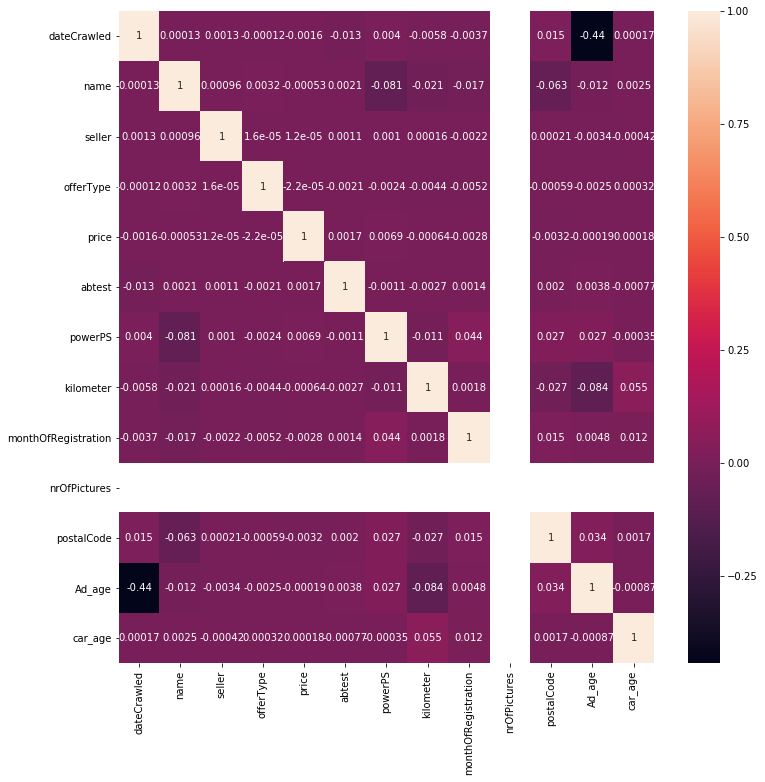

In [69]:
plt.figure(figsize=(12,12))
sns.heatmap(cars.corr(), annot=True)

Conclusion:

I have tried to do stuff in order to understand the very basic topics about: the data interpretation, selection and also data visualization.

